In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/12U_ExotrailM+_PerpendicularLifetime.txt'
# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/12U_ExotrailM+_Lifetime.txt'

# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/16U_Exotrail_LifetimeL_Perpendicular.txt'
# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/16U_Exotrail_LifetimeL_MidSFU.txt'
# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/16U_Exotrail_LifetimeL_LowSFU.txt'
# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/16U_Exotrail_LifetimeL.txt'
# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/16U_Exotrail_LifetimeL_Perpendicular_SinglePanel.txt'
# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/16U_Exotrail_LifetimeL_Perpendicular_SinglePanel_SRPTEST.txt'
path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/16U_Enpulsion_Lifetime_Streamlined.txt'

dataset = pd.read_fwf(path_to_txt)

In [2]:
# filename = path_to_txt.split('/')[-1].split('_')

# if filename[0] == '12U':
#     satellite_mass = 20
# else:
#     satellite_mass = 25

satellite_mass = 25

In [8]:
filename

NameError: name 'filename' is not defined

In [9]:
elapsed_days = dataset['SC.ElapsedDays'].values.tolist()
alt_list = dataset['SC.Earth.Altitude'].values.tolist()
fuel_qty = dataset['SC.ElectricTank1.FuelMass'].values.tolist()
sma_list = dataset['SC.Earth.SMA'].values.tolist()
ecc_list = dataset['SC.Earth.ECC'].values.tolist()
inc_list = dataset['SC.EarthMJ2000Eq.INC'].values.tolist()


number_of_burns = dataset['Number_Of_Burns'].values.tolist()
burn_durations = dataset['BurnDur550'].values.tolist()


changelist = [i for i in range(1,len(fuel_qty)) if fuel_qty[i]!=fuel_qty[i-1] ]

# Drag area during descent, %20 duty cycle
# Drag area during mission, %20 duty cycle for high drag
# Drag area during mission, full streamlined for low drag 


# Exotrail L, 0.7kg fuel mass
# Exotrail M+, 0.4kg fuel mass
# 2.5e-3 N, 800s Isp

# SFU
# Low = 130 
# Mid  = 160
# Default = 190

In [31]:
changelist[0]
sma_list[changelist[0]]

6727.988939302699

In [10]:
print(f'Simulation Duration:{max(elapsed_days):.2f} days')
print(f'Time from deployment to mission altitude: {elapsed_days[changelist[1]]:.2f} days')
print(f'Time spent on mission altitude: {elapsed_days[changelist[-1]]-elapsed_days[changelist[0]]:.2f} days')
print(f'Decay time after misson: {max(elapsed_days)-elapsed_days[changelist[-1]]:.2f} days\n')

print(f'Satellite wet mass: {satellite_mass} kg')
print(f'Satellite dry mass', satellite_mass-max(fuel_qty),'kg\n')

print(f'Max Δv provided by the thruster: {800*9.81*np.log(satellite_mass/(satellite_mass-max(fuel_qty))):.2f} m/s')
print(f'Number of Burns: {max(number_of_burns):.2f} ')
print(f'Longest burn duration: {max(burn_durations):.2f} s')
print(f'Shortest burn duration: {min(burn_durations[changelist[0]:]):.2f} s')
print(f'Average burn duration: {mean(burn_durations[changelist[0]:]):.2f} s')
print(f'Burn frequency: {max(number_of_burns) / (elapsed_days[changelist[-1]]-elapsed_days[changelist[0]]):.2f} burns per day')


Simulation Duration:1826.29 days
Time from deployment to mission altitude: 89.06 days
Time spent on mission altitude: 1552.48 days
Decay time after misson: 184.75 days

Satellite wet mass: 25 kg
Satellite dry mass 24.78 kg

Max Δv provided by the thruster: 69.37 m/s
Number of Burns: 29960.00 
Longest burn duration: 0.00 s
Shortest burn duration: 0.00 s
Average burn duration: 0.00 s
Burn frequency: 19.30 burns per day


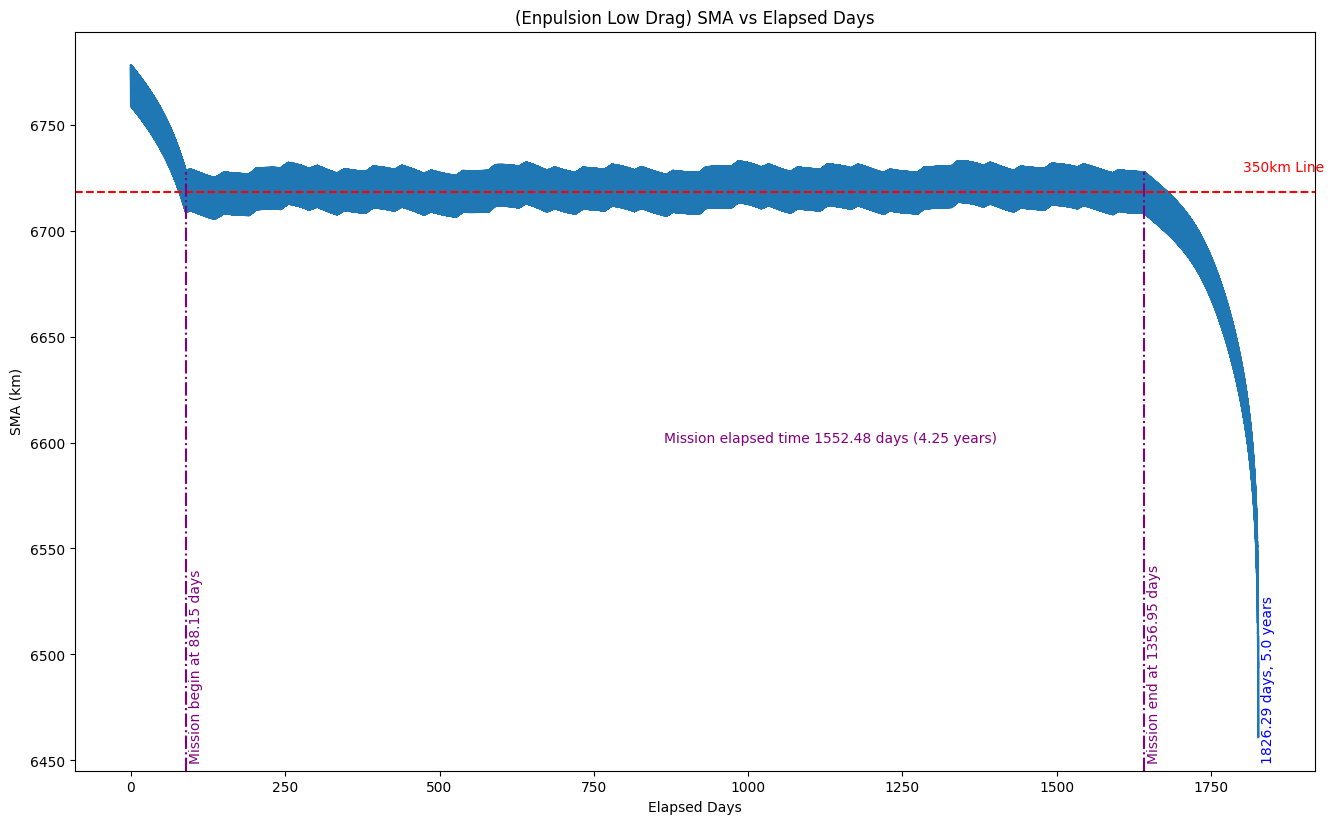

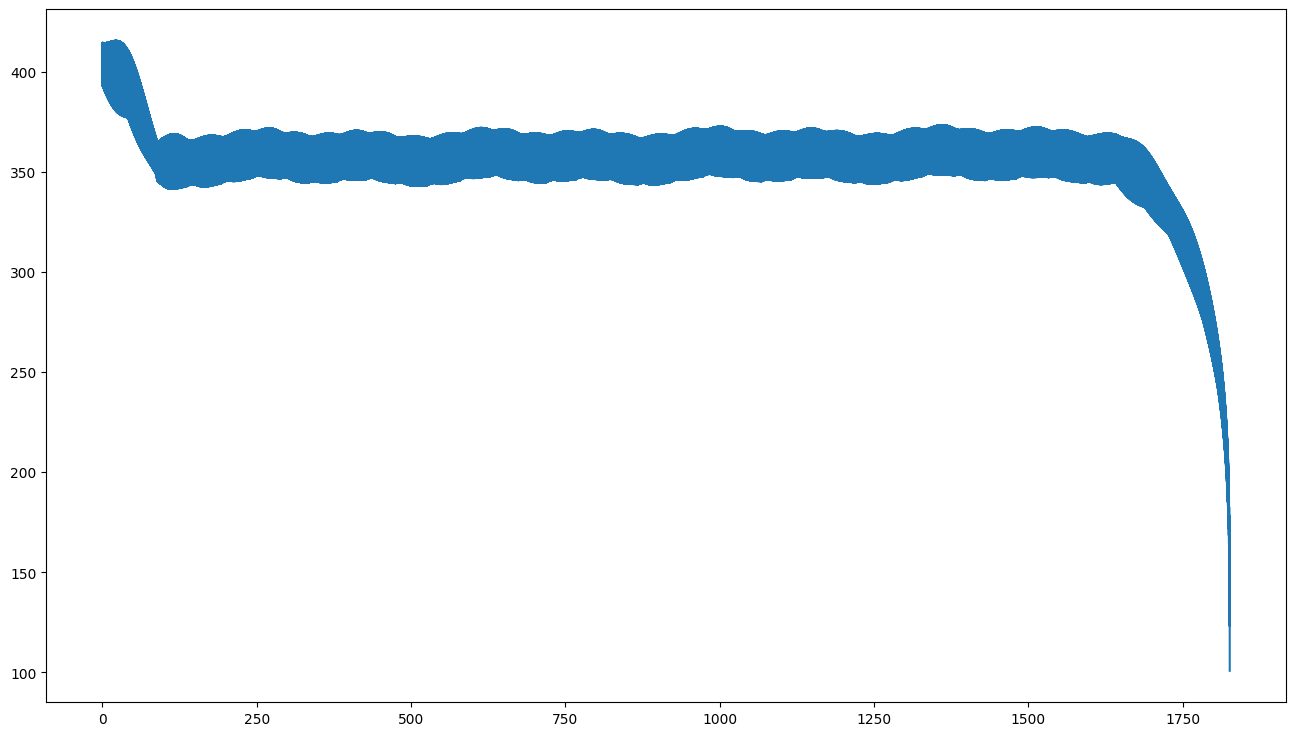

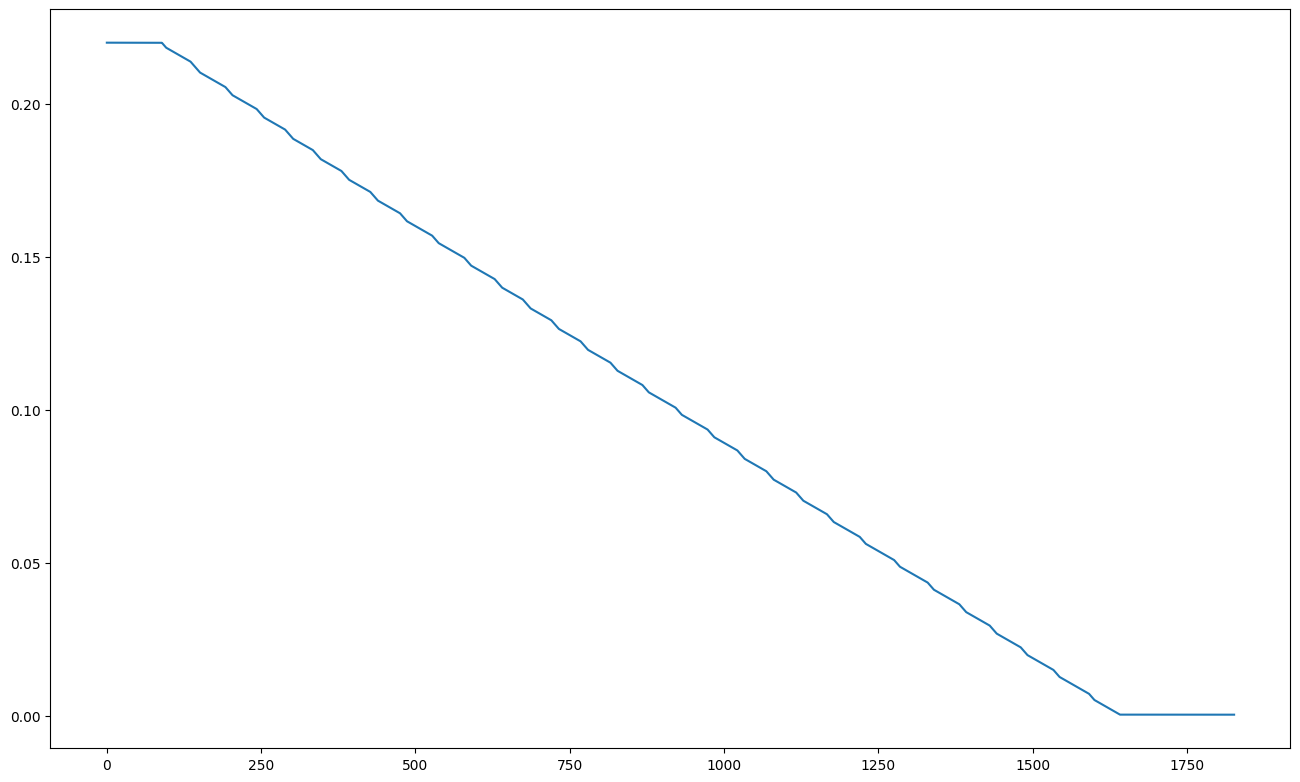

In [12]:
max_lenght = round(max(elapsed_days),2)
message = str(max_lenght) + ' days, ' + str(round(max_lenght/365,2)) +' years'
missiontime = 'Mission elapsed time ' + str(round(elapsed_days[changelist[-1]]-elapsed_days[changelist[0]],2)) + ' days (' + str(round((elapsed_days[changelist[-1]]-elapsed_days[changelist[0]])/365,2)) + ' years)'

plt.figure(figsize=(16,9.6))

## plt.title(f'({filename[0]} High Drag Mode w/ Single Panel) SMA vs Elapsed Days')
plt.title(f'(Enpulsion Low Drag) SMA vs Elapsed Days')
plt.ylabel('SMA (km)')
plt.xlabel('Elapsed Days')
plt.plot(elapsed_days,sma_list)
plt.text(elapsed_days[-1]+5,6450,message,color='b', rotation=90)

plt.axhline(350+6368.14, color='r', linestyle='--')
plt.text(elapsed_days[-1]-25,360+6368.14, '350km Line', color='red')

plt.axvline(elapsed_days[changelist[0]],0,0.81,color='purple',linestyle='-.')
plt.axvline(elapsed_days[changelist[-1]], 0,0.81,color='purple',linestyle='-.')

# plt.axhline(6378.14,0,color='black')


plt.text((elapsed_days[-1]+elapsed_days[0])/2-50,6600, missiontime, color='purple')
plt.text(elapsed_days[changelist[0]]+5, 6450, 'Mission begin at 88.15 days' ,color='purple',rotation=90 )
plt.text(elapsed_days[changelist[-1]]+5, 6450, 'Mission end at 1356.95 days' ,color='purple',rotation=90 )
plt.show()

fig = plt.figure(figsize=(16,9))
# plt.figure(figsize=(16,9.6))
plt.plot(elapsed_days,alt_list)
# plt.axhline(100,0,color='black',linestyle='dotted')
plt.show()

plt.figure(figsize=(16,9.6))
plt.plot(elapsed_days,fuel_qty)
plt.show()
